In [6]:
import random
import hashlib
import matplotlib.pyplot as plt

random.seed(2022273+2022482)

In [7]:
class HashTable:
    def __init__(self, m, type="universal"):
        self.m = m
        self.A = [[] for _ in range(m)]

        if type == "universal":
            p = 524287
            a = random.randint(1, p-1)
            self.hash_func = lambda x: ((a*x) % p) % m 

        elif type == "random":
            self.hash_func = lambda x: int(m * random.random())

    def add(self, x):
        self.A[self.hash_func(x)].append(x)
        return self.hash_func(x)
    
    def get_max_len(self):
        return max([len(i) for i in self.A])
    
    def get_min_len(self):
        return min([len(i) for i in self.A])

def md5(s):
    return int(hashlib.md5(s.encode()).hexdigest()[-4:], 16)

In [8]:
words_hashes = []

with open("words.txt") as f:
    for i in f:
        words_hashes.append(md5(i.rstrip("\n")))

with open("word_hashes.txt", "w") as f:
    f.write("\n".join(map(str, words_hashes)))

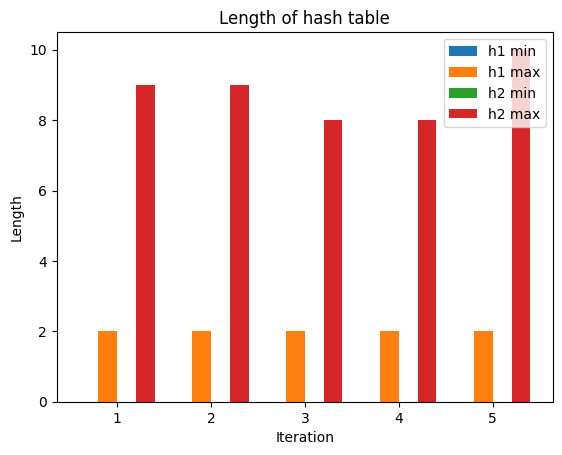

In [9]:
m = 500000

h1_mins = []
h1_maxs = []
h2_mins = []
h2_maxs = []

for _ in range(5):
    h1 = HashTable(m, "universal")
    h2 = HashTable(m, "random")

    for i in range(1, m+1):
        h1.add(i)
        h2.add(i)

    h1_mins.append(h1.get_min_len())
    h1_maxs.append(h1.get_max_len())
    h2_mins.append(h2.get_min_len())
    h2_maxs.append(h2.get_max_len())

fig, ax = plt.subplots()
bar_width = 0.2
index = list(range(1, 6))

rects1 = ax.bar([i - 1.5*bar_width for i in index], h1_mins, bar_width, label='h1 min')
rects2 = ax.bar([i - 0.5*bar_width for i in index], h1_maxs, bar_width, label='h1 max')
rects3 = ax.bar([i + 0.5*bar_width for i in index], h2_mins, bar_width, label='h2 min')
rects4 = ax.bar([i + 1.5*bar_width for i in index], h2_maxs, bar_width, label='h2 max')

ax.set_xlabel('Iteration')
ax.set_ylabel('Length')
ax.set_title('Length of hash table')
ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

plt.show()

In [10]:
def flajolet_martin(hashes):
    m = 500000
    word_hashtable = HashTable(m, "universal")

    z = 0
    for i in hashes:
        hash_value = bin(word_hashtable.add(i))
        if hash_value == "0b0":
            z = max(z, 1)
            continue
        for idx, digit in enumerate(str(hash_value)[::-1]):
            if digit == "1":
                break
        z = max(z, idx)

    return 2 ** (z + (1/2))

elements = []
for i in range(10):
    elements.append(flajolet_martin(words_hashes))
    print(f"Estimated number of unique elements ({i+1}): {elements[-1]}")

print(f"Average: {sum(elements)/len(elements)}")

Estimated number of unique elements (1): 46340.95001184158
Estimated number of unique elements (2): 370727.60009473265
Estimated number of unique elements (3): 23170.47500592079
Estimated number of unique elements (4): 46340.95001184158
Estimated number of unique elements (5): 185363.80004736633
Estimated number of unique elements (6): 370727.60009473265
Estimated number of unique elements (7): 46340.95001184158
Estimated number of unique elements (8): 370727.60009473265
Estimated number of unique elements (9): 92681.90002368316
Estimated number of unique elements (10): 92681.90002368316
Average: 164510.3725420376
